In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import time
import torch
import torch.optim as optim
import torch.nn.functional as F
from argparse import ArgumentParser
from torch.distributions import MultivariateNormal

from nf.TNF import *
from nf.models import NormalizingFlowModel

from tensorboardX import SummaryWriter

from shapely.geometry import Point, Polygon
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Define fixed colormap
myCmap = plt.cm.viridis  
cmap_norm = plt.Normalize(vmin=-1, vmax=1)  # Define the range of the colormap

# distMean = np.array([0.,0.,0.])
# distCov = np.array([        [42.8, 0., 0.],
#                             [0., 63.2, 0.],
#                             [0., 0., 0.37]    ])

In [3]:
def plot_data(samples, isColor=False, **kwargs):

    if isColor:
        x = samples[:, 0]
        y = samples[:, 1]
        colors = samples[:, 2]    
        plt.scatter(x, y, c=colors, cmap=myCmap, alpha=0.5, s=5.5, norm=cmap_norm)
        plt.colorbar(label='alpha')
        plt.xlabel('x')
        plt.ylabel('y')

    else:
        plt.scatter(samples[:, 0], samples[:, 1], s=1, marker="o", **kwargs)    
        plt.xlabel("x")
        plt.ylabel("y")

# read the hull points from file
with open('hull_points.txt', 'r') as f:
    lines = f.readlines()
    cell_coords = np.zeros((len(lines), 2))
    for i in range(len(lines)):
        line = lines[i].split('\t')
        cell_coords[i,0] = float(line[0]) - 184.9460 
        cell_coords[i,1] = float(line[1]) - 188.1720
        # cell_coords[i,0] = float(line[0])
        # cell_coords[i,1] = float(line[1])

# print(cell_coords)
# close the polygon
cell_coords_closed = np.append(cell_coords, [cell_coords[0]], axis=0)
        
# cutoff = 20
# numchosen = 89
# datapoints = np.zeros((cutoff*numchosen,3))
# # read from file the first, second, and fourth columns
# with open('new_traj_frame_wise.txt', 'r') as f:
#     for i in range(cutoff*numchosen):
#         line = f.readline()
#         line = line.split('\t')
#         # datapoints[i,0] = float(line[0])
#         # datapoints[i,1] = float(line[1])
#         datapoints[i,0] = float(line[0]) - 194.4821
#         datapoints[i,1] = float(line[1]) - 187.9119
#         datapoints[i,2] = float(line[3])
#         # datapoints[i,3] = float(line[3])

datapoints = np.load('new_traj.npy')
datapoints = datapoints - np.array([184.9460, 188.1720, 0.0])
print('shape of datapoints', datapoints.shape)

shape of datapoints (11071, 3)


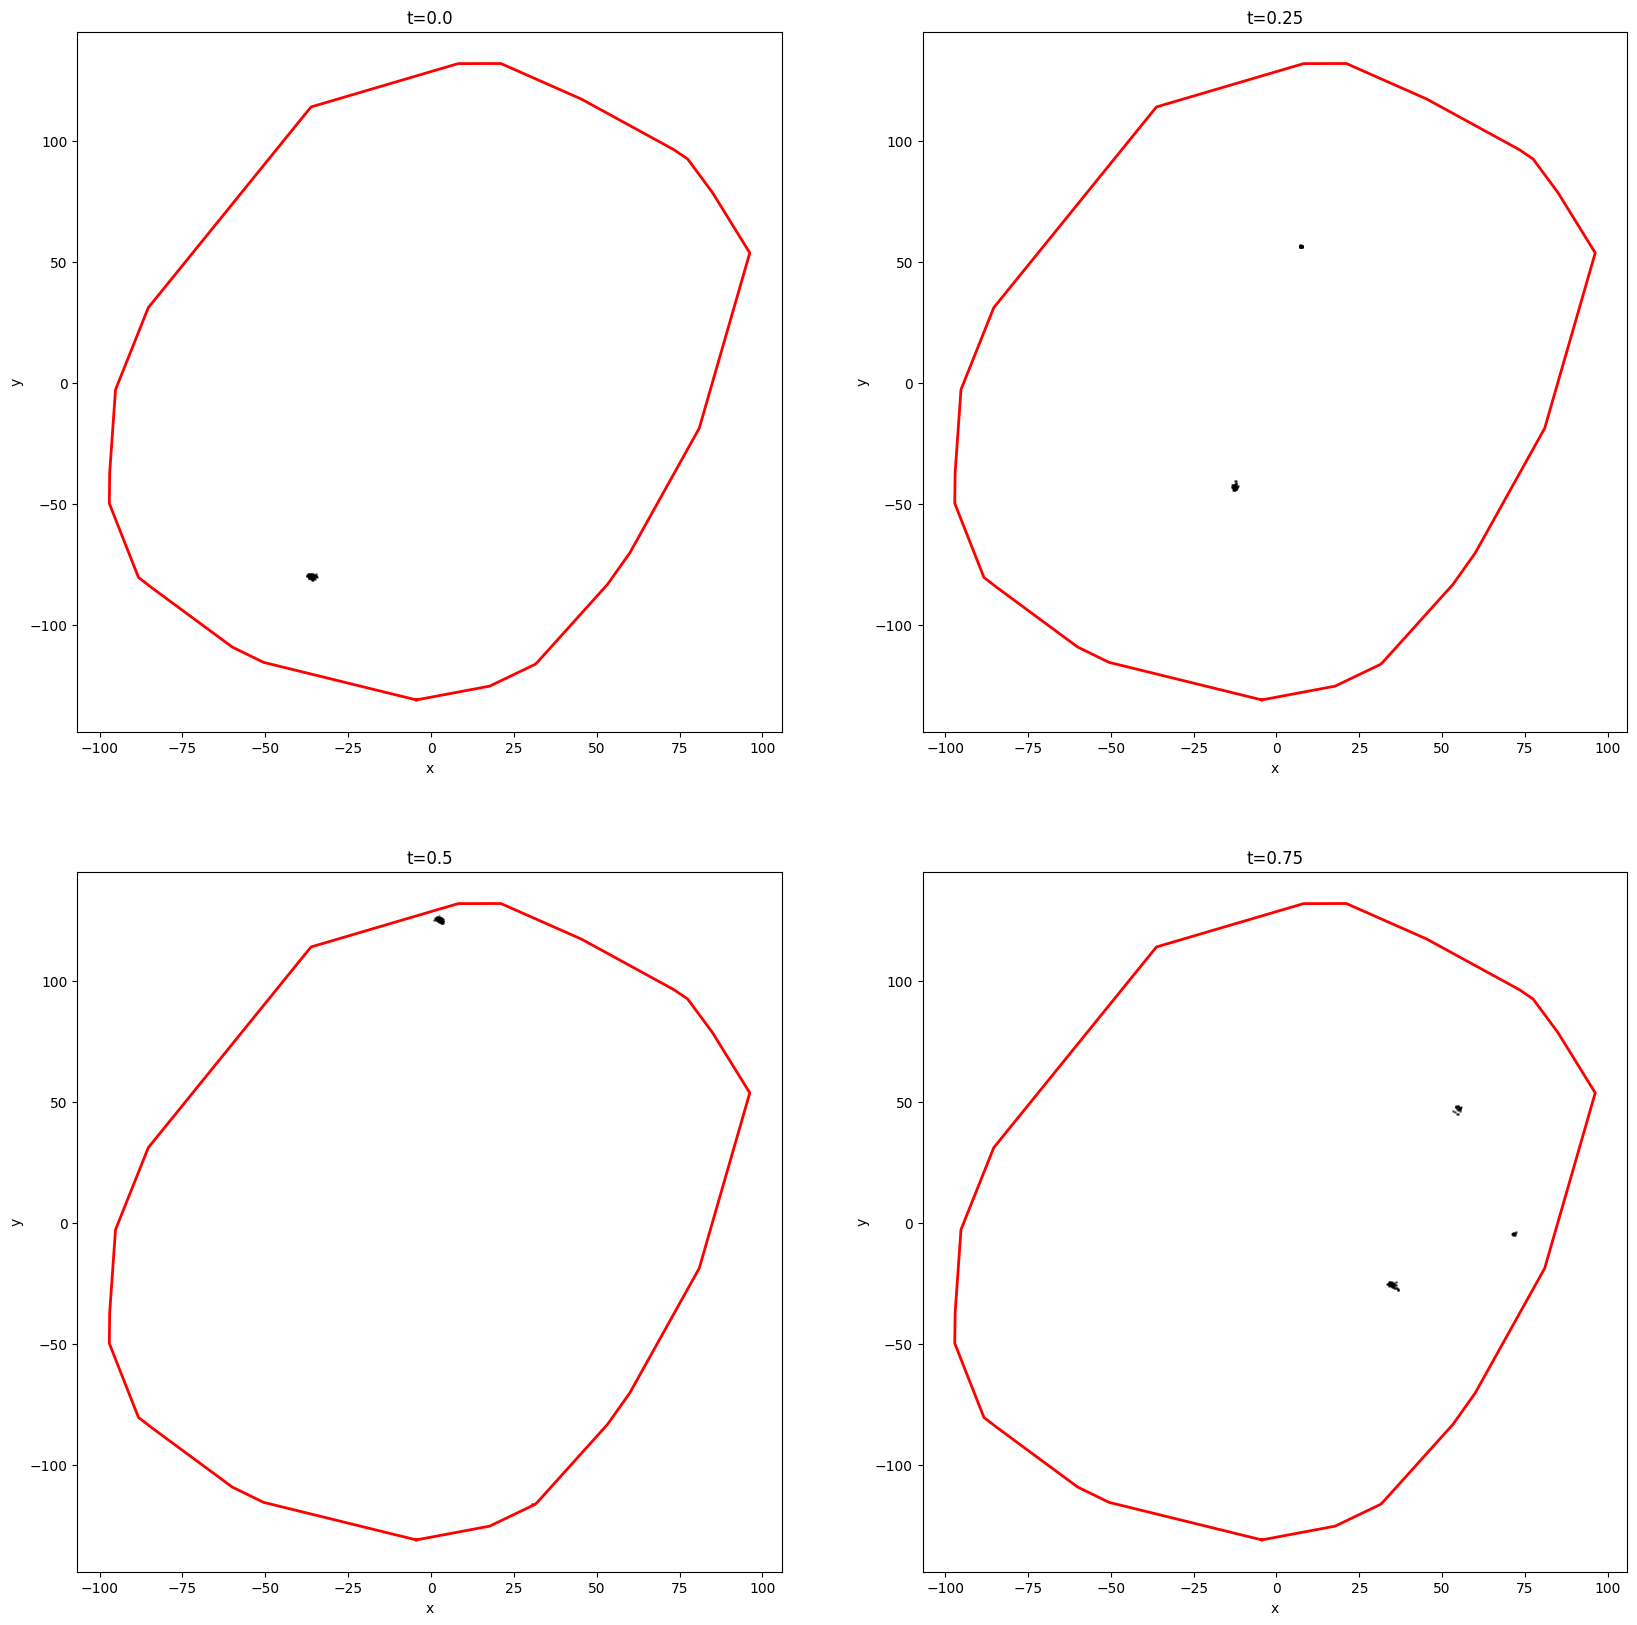

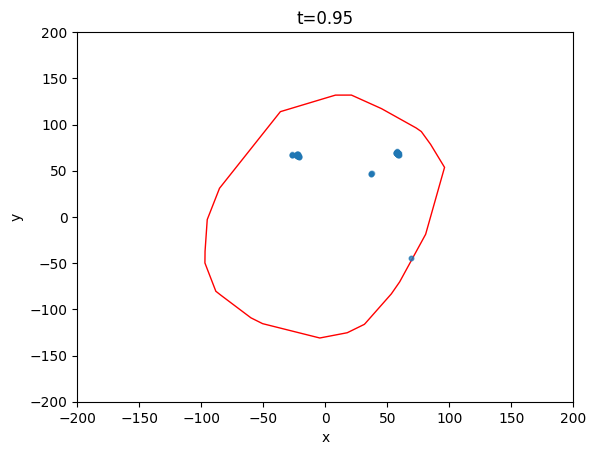

In [4]:
# Resampling
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
# samples = model.sample(10000, t=0).data
# select the first entry in every cutoff entries
curdata1 = datapoints[0:90, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata1, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.0")

plt.subplot(2, 2, 2)
# samples = model.sample(10000, t=0.25).data
curdata2 = datapoints[5*89:6*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata2, isColor=False, color="black", alpha=0.5)
# plt.grid()
# plt.xlim((0,300))
# plt.ylim((0,350))
plt.title("t=0.25")

plt.subplot(2, 2, 3)
# samples = model.sample(10000, t=0.5).data
curdata3 = datapoints[10*89:11*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata3, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.5")

plt.subplot(2, 2, 4)
# samples = model.sample(10000, t=0.75).data
curdata4 = datapoints[15*89:16*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata4, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.75")
plt.show()

# show a gif of the distribution over time using FuncAnimation
fig, ax = plt.subplots()
ax.set_xlim((-200, 200))
ax.set_ylim((-200, 200))
polygon = plt.Polygon(cell_coords_closed, closed=True, fill=None, edgecolor='r')
ax.add_patch(polygon)
# sc = plt.scatter([], [], s=10, c=[], cmap=myCmap, alpha=0.5, norm=cmap_norm)
sc = plt.scatter([], [], s=10,alpha=0.5)
# plt.colorbar(sc, label='alpha')
plt.xlabel('x')
plt.ylabel('y')

def update(frame):
    # samples = model.sample(5000, t=frame).data
    samples = datapoints[int(frame*20*89):int((frame+0.05)*20*89), 0:3]
    # print(samples.shape)
    sc.set_offsets(samples)
    # sc.set_array(samples[:,2])
    # set title
    ax.set_title(f't={frame:.2f}')
    return sc,
ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 21)[:-1], blit=True)
ani.save('2D_org_data.gif', fps=3)
# plt.show()

In [6]:
# load the model
model = torch.load('2Duni.pth')
# model.eval()

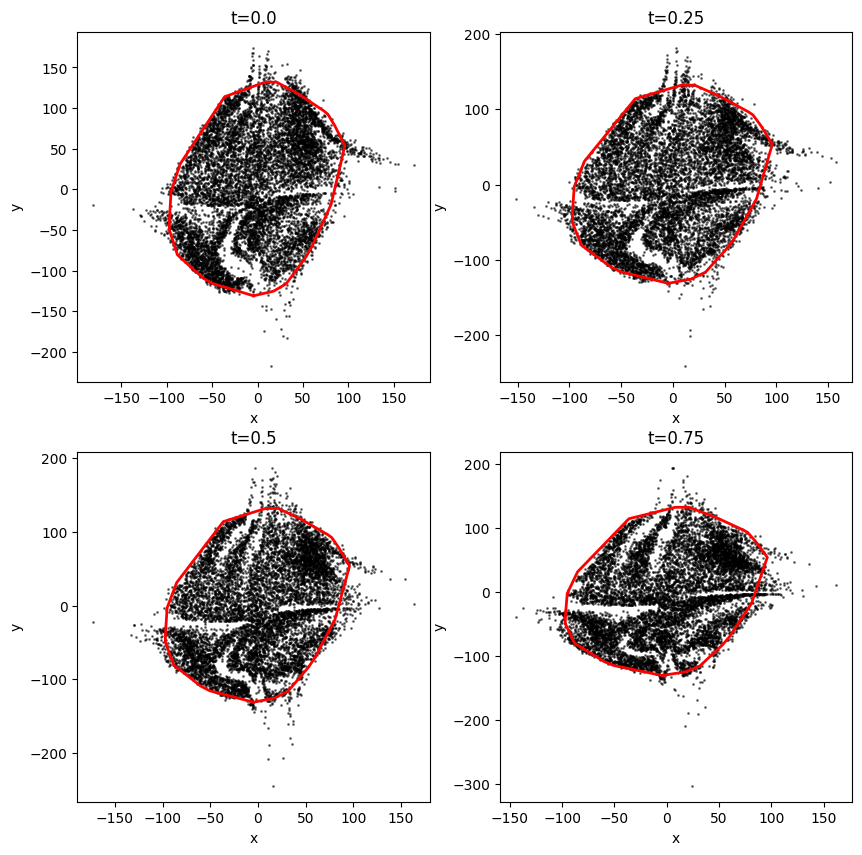

In [7]:
# Resampling
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
samples = model.sample(10000, t=0).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.0")

plt.subplot(2, 2, 2)
samples = model.sample(10000, t=0.25).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.25")

plt.subplot(2, 2, 3)
samples = model.sample(10000, t=0.5).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.5")

plt.subplot(2, 2, 4)
samples = model.sample(10000, t=0.75).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.75")
plt.show()


(100, 500)


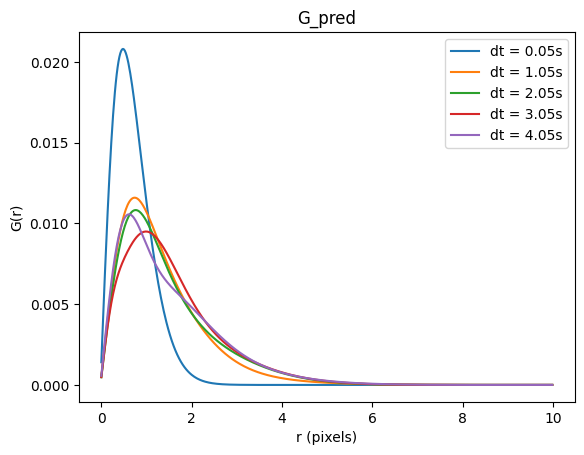

In [22]:
# load the G_pred as the Van Hove function
G_pred = np.loadtxt('G_pred.txt')
print(G_pred.shape)         # (100, 500), 100 frames, 500 bins for r

r_vals = np.arange(0, 10.01, 0.02)
G_pred = G_pred * 2 * np.pi * r_vals[1:]
for i in range(G_pred.shape[0]):
    # normalize the G_pred
    G_pred[i, :] = G_pred[i, :] / np.sum(G_pred[i, :])
    # print(np.sum(G_pred[i, :]))

############### check if this needs to be normalized and multiplied by r ###############
for i in range(1, G_pred.shape[0], 20):
    # plt.plot(r_vals[:-1], G_pred[i, :] * 2 * np.pi * r_vals[1:], label="dt = " + str(round(i*0.05,2)) + "s")
    plt.plot(r_vals[:-1], G_pred[i, :], label="dt = " + str(round(i*0.05,2)) + "s")
    plt.xlabel("r (pixels)")
    plt.ylabel("G(r)")
    plt.title(f"G_pred")
    plt.legend()
plt.show()



In [29]:
num_traj = 100
num_frames = 20

# sample num_traj points from the model at t=0
samples = model.sample(num_traj, t=0).data
# print(samples.shape)        # (100, 2)
gen_traj = np.zeros((num_traj, num_frames, 2))
gen_traj[:, 0, :] = samples
delta_r = np.zeros(num_traj)       # delta_r sampled from G for each trajectory at each frame
delta_xy = np.zeros((num_traj, 2)) # delta_x, delta_y for each trajectory at each frame

for i in range(num_frames-1):
    # sample deltar from the Van Hove function
    delta_r = np.random.choice(G_pred.shape[1], num_traj, p=G_pred[i, :])*0.02
    # print(delta_r)
    # choose a random angle between 0 and 2pi
    theta = np.random.uniform(0, 2*np.pi, num_traj)
    delta_xy[:, 0] = delta_r * np.cos(theta)
    delta_xy[:, 1] = delta_r * np.sin(theta)
    # print(delta_xy)
    gen_traj[:, i+1, :] = gen_traj[:, i, :] + delta_xy
    ############### have to add acceptance probability here ###############

print(gen_traj)



[[[  -3.82253957   30.72214508]
  [  -3.82253957   30.72214508]
  [  -3.07272938   31.10080678]
  ...
  [  -3.4282951    32.21046776]
  [  -3.05916778   33.07495896]
  [  -1.16265648   32.77555135]]

 [[ -26.487854     91.87489319]
  [ -26.487854     91.87489319]
  [ -26.99244005   91.33360498]
  ...
  [ -21.63356086   83.17052086]
  [ -21.627155     82.39054716]
  [ -21.22913991   81.86406451]]

 [[ -44.59000397   18.16789055]
  [ -44.59000397   18.16789055]
  [ -43.05525973   18.29501304]
  ...
  [ -45.18128491   19.8046226 ]
  [ -45.75152129   19.99125184]
  [ -44.240941     20.72647096]]

 ...

 [[ -15.42882633   21.68582344]
  [ -15.42882633   21.68582344]
  [ -15.51179334   21.54901527]
  ...
  [ -12.74494459   25.34366056]
  [ -12.36479178   24.82879763]
  [ -13.32427183   24.86038917]]

 [[ -53.44737625 -101.60124969]
  [ -53.44737625 -101.60124969]
  [ -53.47301328 -101.34251674]
  ...
  [ -50.74949809  -98.4450312 ]
  [ -50.01349302  -97.37344521]
  [ -50.47670849  -94.126318

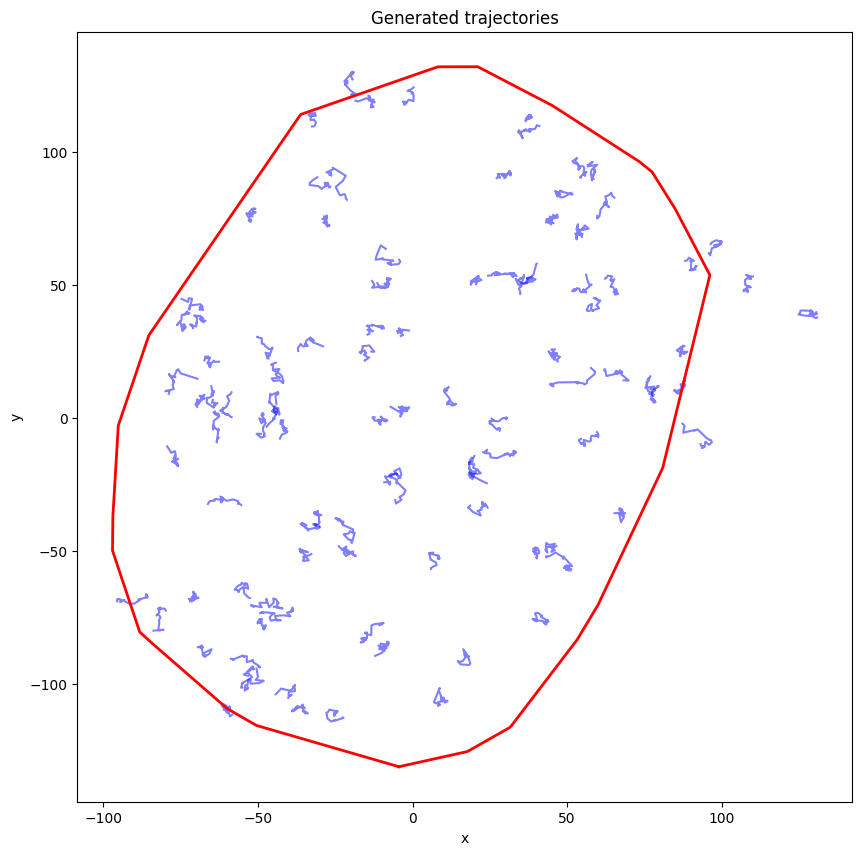

In [30]:
# scatter plot of the generated trajectories
plt.figure(figsize=(10,10))
for i in range(num_traj):
    plt.plot(gen_traj[i, :, 0], gen_traj[i, :, 1], color='blue', alpha=0.5)
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated trajectories")
plt.show()